# 🎲 Simulación Monte Carlo

Este notebook ejecuta y explora las simulaciones Monte Carlo de las carteras.


In [9]:
import sys
import os
sys.path.append('../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
from src.simulation import run_simulation
from src.rebalance_strategies import create_rebalance_strategy

# Configuración
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

# Cargar configuración
with open('../config/settings.yaml', 'r') as f:
    config = yaml.safe_load(f)


## 1. Ejecutar Simulaciones

**Nota:** Las simulaciones completas pueden tardar varios minutos. Si ya se ejecutaron, puedes cargar los resultados directamente.


In [10]:
# Descomentar para ejecutar simulaciones (tarda varios minutos)
# results = run_simulation('../config/settings.yaml')

# O cargar resultados existentes
import glob
results_dir = config['project']['output_dir']

print("Archivos de resultados disponibles:")
for file in glob.glob(f'../{results_dir}metrics_*.csv'):
    print(f"  - {os.path.basename(file)}")


Archivos de resultados disponibles:
  - metrics_cartera_3_base.csv
  - metrics_cartera_2_base.csv
  - metrics_cartera_1_pessimistic.csv
  - metrics_cartera_2_optimistic.csv
  - metrics_cartera_3_pessimistic.csv
  - metrics_cartera_3_optimistic.csv
  - metrics_cartera_2_pessimistic.csv
  - metrics_cartera_1_optimistic.csv
  - metrics_cartera_1_base.csv


## 2. Explorar Resultados de Simulación


In [11]:
# Cargar métricas de una simulación
portfolio_name = 'cartera_1'
scenario_name = 'base'
metrics_path = f'../{results_dir}metrics_{portfolio_name}_{scenario_name}.csv'

if os.path.exists(metrics_path):
    metrics_df = pd.read_csv(metrics_path)
    print(f"Resultados para {portfolio_name} - {scenario_name}")
    print(f"Número de simulaciones: {len(metrics_df)}")
    print("\nEstadísticas descriptivas:")
    print(metrics_df.describe())
else:
    print(f"Archivo no encontrado: {metrics_path}")


Resultados para cartera_1 - base
Número de simulaciones: 10000

Estadísticas descriptivas:
         final_value  total_withdrawals  total_contributions       net_flow  \
count   10000.000000       10000.000000         10000.000000   10000.000000   
mean    23088.167261      141823.796441         10675.250000 -131148.546441   
std     49190.483793       21497.739507          1480.836157   20017.623180   
min         0.000000       75415.352273          5900.000000 -149552.118336   
25%         0.000000      124354.564518          9500.000000 -149552.118336   
50%         0.000000      148495.039976         11200.000000 -137295.039976   
75%     25605.154518      161552.118336         12000.000000 -114854.564518   
max    722380.368195      161552.118336         12000.000000  -69515.352273   

       total_rebalance_costs  months_survived  total_return  
count           10000.000000      10000.00000  10000.000000  
mean                0.005439        106.16060     -0.769118  
std        

## 3. Visualizar Historiales de Simulación


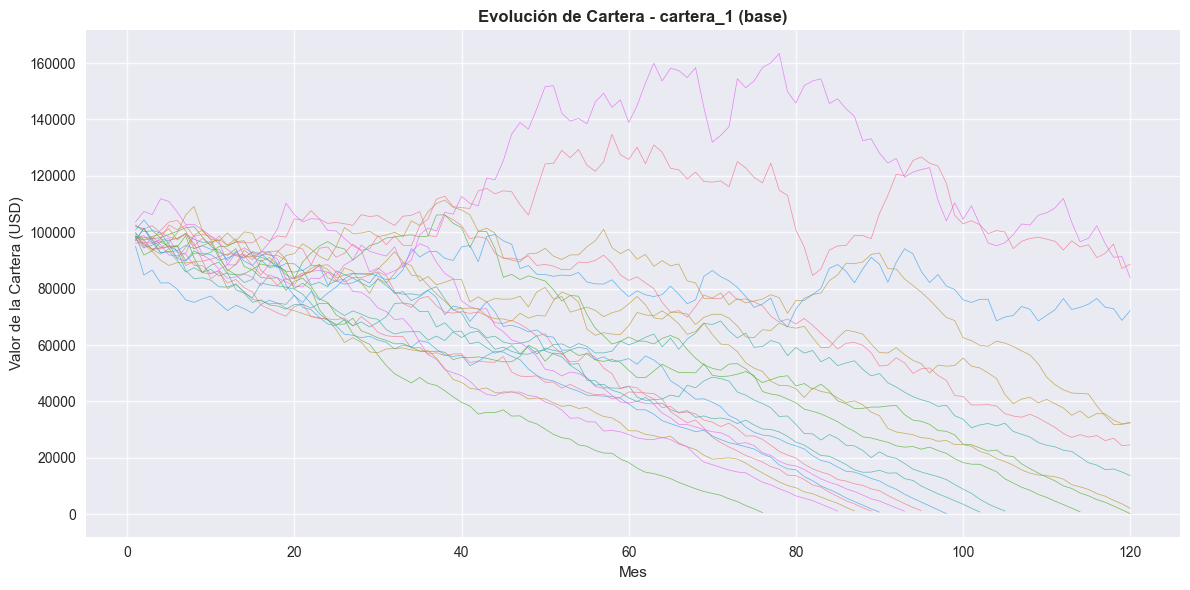

In [12]:
# Cargar algunos historiales
histories_path = f'../{results_dir}histories_{portfolio_name}_{scenario_name}.csv'

if os.path.exists(histories_path):
    histories_df = pd.read_csv(histories_path)
    
    # Visualizar algunos caminos
    fig, ax = plt.subplots(figsize=(12, 6))
    
    for sim_id in histories_df['simulation'].unique()[:20]:
        sim_data = histories_df[histories_df['simulation'] == sim_id]
        ax.plot(sim_data['month'], sim_data['portfolio_value'], alpha=0.8, linewidth=0.5)
    
    ax.set_xlabel('Mes')
    ax.set_ylabel('Valor de la Cartera (USD)')
    ax.set_title(f'Evolución de Cartera - {portfolio_name} ({scenario_name})', fontweight='bold')
    ax.grid(True, alpha=0.8)
    plt.tight_layout()
    plt.show()
else:
    print(f"Archivo no encontrado: {histories_path}")
